In [40]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Reading the Excel File
df = pd.read_excel('ENB2012_data.xlsx')

In [42]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [44]:
#Removing the rows containing any null values
df = df.dropna()
print("Shape of the dataset = {}".format(df.shape))

Shape of the dataset = (768, 10)


In [45]:
#Outliers in X1
print("Highest allowed = ", df["X1"].mean()+ 3* df["X1"].std())
print("Lowest allowed = ", df["X1"].mean()- 3* df["X1"].std())
df[(df["X1"]<0.44) | (df["X1"]>1.08) ]

Highest allowed =  1.0814990942909224
Lowest allowed =  0.44683423904241093


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [46]:
#Outliers in X2
print("Highest allowed = ", df["X2"].mean()+ 3* df["X2"].std())
print("Lowest allowed = ", df["X2"].mean()- 3* df["X2"].std())
df[(df["X2"]<407.44) | (df["X2"]>935.96) ]

Highest allowed =  935.9666815009384
Lowest allowed =  407.4499851657283


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [47]:
#Outliers in X3
print("Highest allowed = ", df["X3"].mean()+ 3* df["X3"].std())
print("Lowest allowed = ", df["X3"].mean()- 3* df["X3"].std())
df[(df["X3"]<187.62) | (df["X3"]>449.37) ]

Highest allowed =  449.37944431398466
Lowest allowed =  187.6205556860153


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [48]:
#Outliers in Y1
print("Highest allowed = ", df["Y1"].mean()+ 3* df["Y1"].std())
print("Lowest allowed = ", df["Y1"].mean()- 3* df["Y1"].std())
df[(df["Y1"]< -7.96) | (df["Y1"]> 52.57) ]

Highest allowed =  52.57780722306107
Lowest allowed =  -7.963416598061073


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


In [145]:
#Splitting the dataset into 80:20 Ratio 
output_col1 = "Y1" 
x = df.drop(columns = ["Y1" , "Y2"])
y = df.loc[:, output_col1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.20, random_state = 43)

In [146]:
x_train

,X1,X2,X3,X4,X5,X6,X7,X8
497,0.79,637.0,343.0,147.0,7.0,3,0.25,5
520,0.64,784.0,343.0,220.5,3.5,2,0.25,5
236,0.62,808.5,367.5,220.5,3.5,2,0.10,4
141,0.62,808.5,367.5,220.5,3.5,3,0.10,2
727,0.90,563.5,318.5,122.5,7.0,5,0.40,5
...,...,...,...,...,...,...,...,...
16,0.79,637.0,343.0,147.0,7.0,2,0.00,0
58,0.86,588.0,294.0,147.0,7.0,4,0.10,1
277,0.66,759.5,318.5,220.5,3.5,3,0.10,5
255,0.82,612.5,318.5,147.0,7.0,5,0.10,5


In [147]:
x_test

,X1,X2,X3,X4,X5,X6,X7,X8
557,0.71,710.5,269.5,220.5,3.5,3,0.40,1
383,0.62,808.5,367.5,220.5,3.5,5,0.25,2
680,0.86,588.0,294.0,147.0,7.0,2,0.40,4
205,0.82,612.5,318.5,147.0,7.0,3,0.10,4
188,0.62,808.5,367.5,220.5,3.5,2,0.10,3
...,...,...,...,...,...,...,...,...
344,0.86,588.0,294.0,147.0,7.0,2,0.25,2
470,0.66,759.5,318.5,220.5,3.5,4,0.25,4
245,0.90,563.5,318.5,122.5,7.0,3,0.10,5
645,0.76,661.5,416.5,122.5,7.0,3,0.40,3


In [148]:
#Training the Model with sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [149]:
lr.coef_

array([-6.19339058e+01, -5.69219675e-02,  3.40377775e-02, -4.54798726e-02,
        4.37608573e+00, -2.49251236e-02,  1.98427197e+01,  2.66118143e-01])

In [150]:
lr.intercept_

np.float64(76.79880361014831)

In [151]:
#Testing the Model
predicted_value = lr.predict(x_test)
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [152]:
cost

6.58163623406875

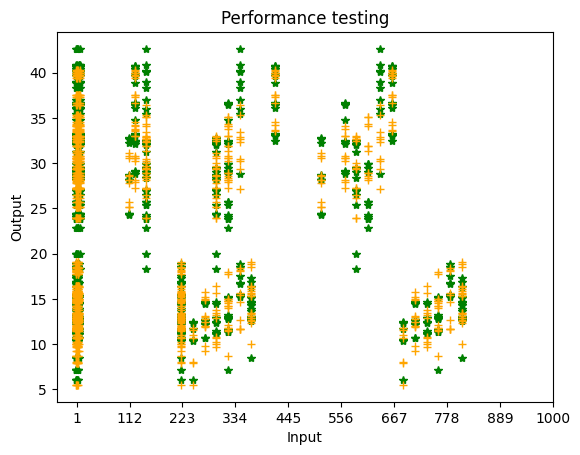

In [153]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "orange")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 1000, 10))
plt.ylabel("Output")
plt.show()

In [154]:
#Training the Ridge Model
from sklearn.linear_model import Ridge
alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [155]:
#Testing the Ridge Model
prediction_ridge = ridge.predict(x_test)

In [156]:
from sklearn.metrics import mean_squared_error
cost_ridge = mean_squared_error(y_test, prediction_ridge)

In [157]:
cost_ridge

6.904184114017043

In [158]:
#Training the Lasso Model
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [159]:
#Testing the Lasso Model
prediction_lasso = lasso.predict(x_test)

In [160]:
from sklearn.metrics import mean_squared_error
cost_lasso = mean_squared_error(y_test, prediction_lasso)

In [161]:
cost_lasso

7.881360273973602

In [164]:
#Training the Model Made from Scratch
x_train_bias = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_bias = np.c_[np.ones((x_test.shape[0], 1)), x_test]

theta = np.zeros(x_train_bias.shape[1])
 
def compute_cost(x, y, theta):
    m = len(y)
    predictions = x.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(x, y, theta, learning_rate=0.01, iterations=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        error = predictions - y
        theta -= (learning_rate / m) * x.T.dot(error)
        
        cost_history[i] = compute_cost(x, y, theta)
    
    return theta, cost_history

theta_optimal, cost_history = gradient_descent(x_train_bias, y_train, theta, learning_rate=0.01, iterations=20)

print("Optimal theta:", theta_optimal)

Optimal theta: [-8.76651507e+70 -6.61396156e+70 -5.95827426e+73 -2.79141749e+73
 -1.58342839e+73 -4.47030170e+71 -3.06146825e+71 -2.06463929e+70
 -2.43160014e+71]


In [166]:
#Testing the Model made from Scratch
y_pred = x_test_bias.dot(theta_optimal)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared on test set: {r2}')

Mean Squared Error on test set: 2.7927370986444798e+153
R-squared on test set: -2.6799081918886266e+151


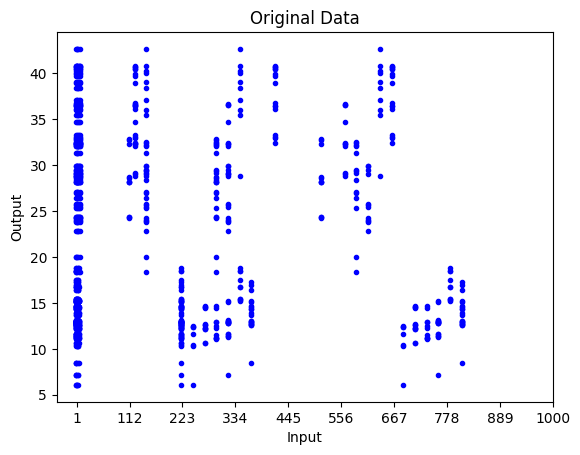

In [176]:
plt.plot(x_test, y_test, ".", color = "blue")
plt.title("Original Data")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 1000, 10))
plt.ylabel("Output")
plt.show()

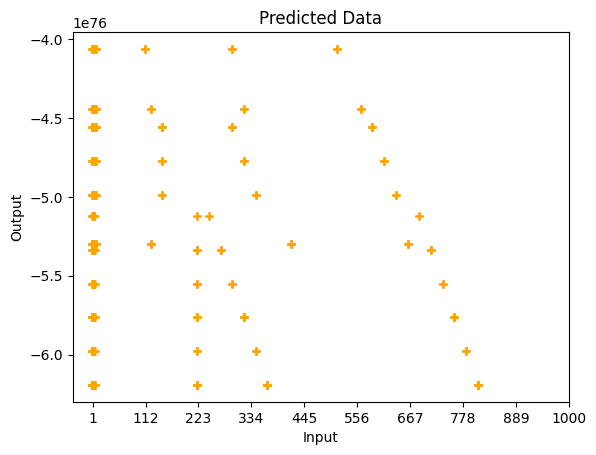

In [175]:
plt.plot(x_test, y_pred, "+", color = "orange")
plt.title("Predicted Data")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 1000, 10))
plt.ylabel("Output")
plt.show()

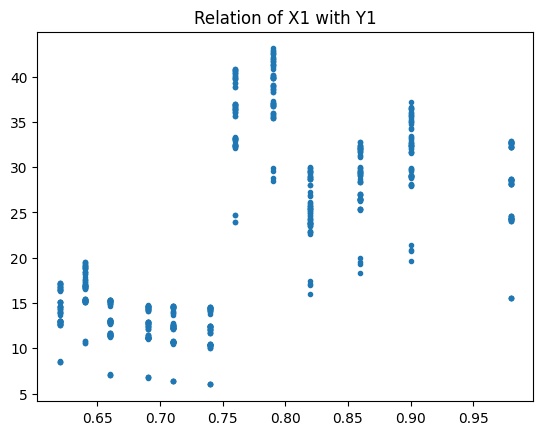

In [181]:
x = df.loc[:, "X1"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X1 with Y1')
plt.show()

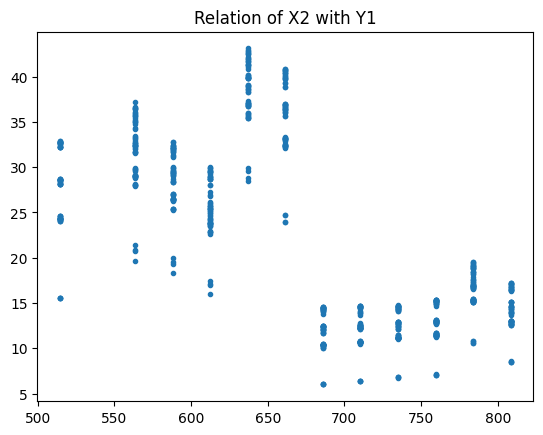

In [182]:
x = df.loc[:, "X2"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X2 with Y1')
plt.show()

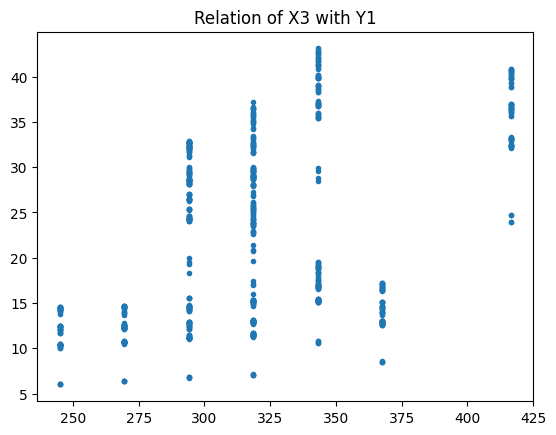

In [183]:
x = df.loc[:, "X3"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X3 with Y1')
plt.show()

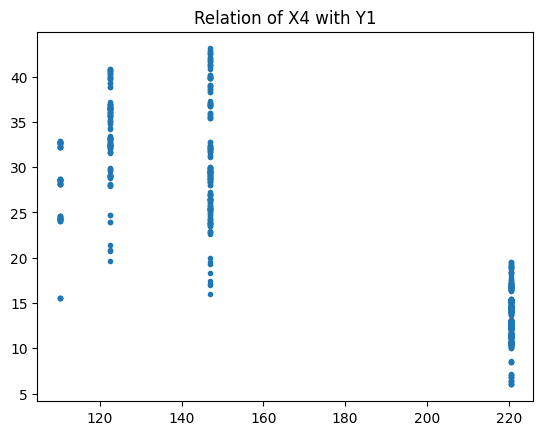

In [184]:
x = df.loc[:, "X4"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X4 with Y1')
plt.show()

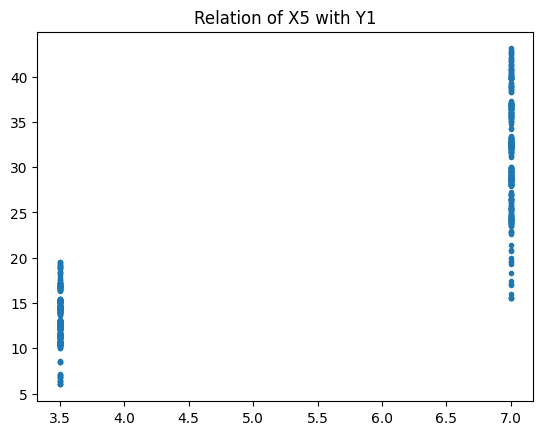

In [185]:
x = df.loc[:, "X5"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X5 with Y1')
plt.show()

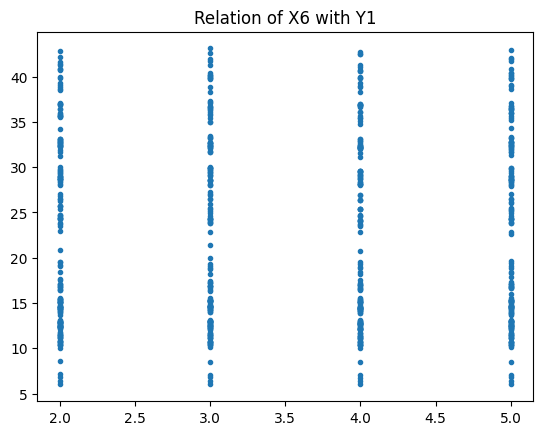

In [186]:
x = df.loc[:, "X6"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X6 with Y1')
plt.show()

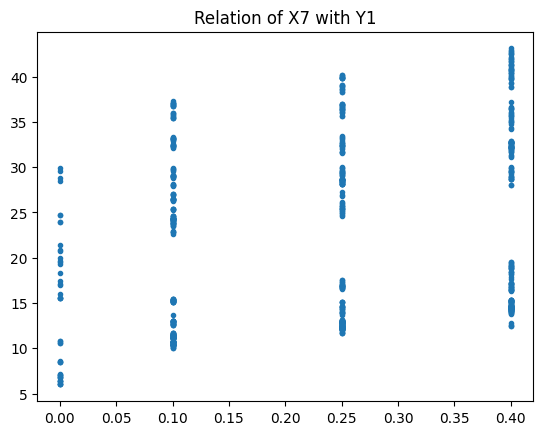

In [187]:
x = df.loc[:, "X7"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X7 with Y1')
plt.show()

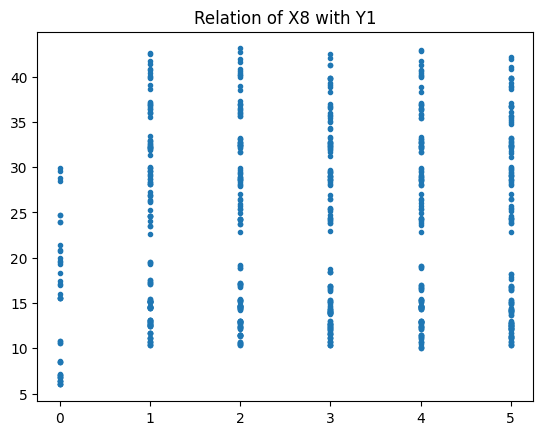

In [188]:
x = df.loc[:, "X8"]
y = df.loc[:, "Y1"]
plt.plot(x, y,  '.')
plt.title('Relation of X8 with Y1')
plt.show()

In [ ]:
#Following remarks can be taken when above graphs are studied
#Value of Y1 increases with the value of X5 and X7
#Value of Y1 decreases sharply after a certain value of X4
#Value of Y1 increases with the increase in the value of X1,X2 and X3 but then decreases with the further increase